In [1]:
import copy
import requests
import json
import datetime

from news_signals import signals

In [2]:
# utility function for getting a wikidata id from an entity name

WIKIDATA_SEARCH_URL = "https://www.wikidata.org/w/api.php"
DEFAULT_SEARCH_PARAMS = {
    "action": "wbsearchentities",
    "format": "json",
    "errorformat": "plaintext",
    "language": "en",
    "uselang": "en",
    "type": "item",
    "limit": 1
}
WD_ENTITY_BASE_URL = 'https://www.wikidata.org/wiki/Special:EntityData'
    

def search_wikidata(surface_form, min_length=3):
    params = copy.deepcopy(DEFAULT_SEARCH_PARAMS)
    params["search"] = surface_form
    result = []
    try:
        print(f'querying wikidata with params: {params}')
        r = requests.get(url=WIKIDATA_SEARCH_URL, params=params)
        data = json.loads(r.text)
        if 'search' in data:
            result = data['search']
            result = result[0:min(100, len(result))]
    except Exception as e:
        print(f'Error searching wikidata for surface form: {surface_form}')
        print(e)
    return result

In [3]:
# let's setup the entity we want to work with

entity_name = 'Twitter'

entity_id_candidates = search_wikidata(entity_name)
test_entity = entity_id_candidates[0]

querying wikidata with params: {'action': 'wbsearchentities', 'format': 'json', 'errorformat': 'plaintext', 'language': 'en', 'uselang': 'en', 'type': 'item', 'limit': 1, 'search': 'Twitter'}


In [4]:
test_entity

{'id': 'Q918',
 'title': 'Q918',
 'pageid': 1241,
 'display': {'label': {'value': 'Twitter', 'language': 'en'},
  'description': {'value': 'American social networking site',
   'language': 'en'}},
 'repository': 'wikidata',
 'url': '//www.wikidata.org/wiki/Q918',
 'concepturi': 'http://www.wikidata.org/entity/Q918',
 'label': 'Twitter',
 'description': 'American social networking site',
 'match': {'type': 'label', 'language': 'en', 'text': 'Twitter'}}

In [5]:
# cool, now let's create a signal

signal = signals.AylienSignal(
    name=test_entity['label'],
    params={"entity_ids": [test_entity['id']]}
)

In [6]:
# let's instantiate our signal for the timeperiod we care about
start = '2023-01-01'
end = '2023-02-21'

timeseries_signal = signal(start, end)

<Axes: xlabel='date'>

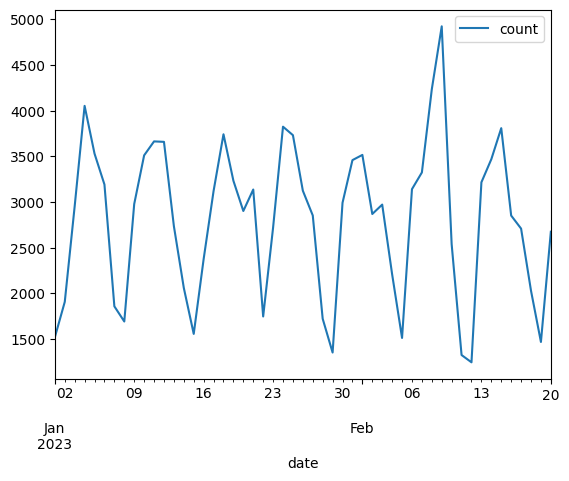

In [7]:
# have a look at the time period
signal.plot()

<Axes: xlabel='date'>

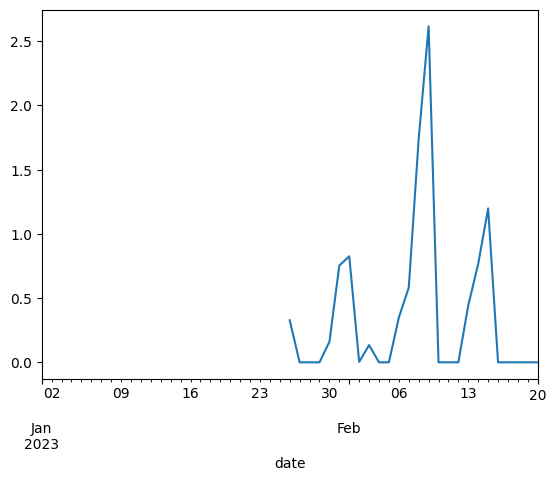

In [8]:
# did the signal have any unexpected spikes?
anomaly_signal = signal.anomaly_signal()
anomaly_signal.anomalies.plot()

In [9]:
# let's have a look at the biggest anomaly
highest_anomaly_day = signal.anomalies.idxmax()

In [10]:
highest_anomaly_day

Timestamp('2023-02-09 00:00:00+0000', tz='UTC')

In [11]:
# what was going on that day?

stories_df = signal.sample_stories_in_window(
    start=highest_anomaly_day,
    end=highest_anomaly_day + datetime.timedelta(days=1)
)

for s in stories_df.stories[0]:
    print(s['title'])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]

Twitter experiencing outages nationwide
Twitter experiencing international outages; most users can’t tweet or DM
It's Not Just You, Twitter Is Acting Weird     - CNET
: Twitter briefly goes down
Twitter experiencing outages nationwide
Former Twitter execs tell Republicans they erred on Hunter Biden laptop story
Twitter outage: what happened, when will service be restored, and more
Disney earnings: Twitter has thoughts on layoffs, password-sharing, and streaming prices
Twitter experiencing outages nationwide
Twitter experiencing outages nationwide


In [13]:
# a dataframe for you
df = signal.df

In [14]:
df['2023-01-01':'2023-01-10']

,count,published_at,anomalies,stories,signal_name,freq
date,,,,,,
2023-01-01 00:00:00+00:00,1518,2023-01-01T00:00:00Z,NaN,NaN,Twitter,D
2023-01-02 00:00:00+00:00,1906,2023-01-02T00:00:00Z,NaN,NaN,Twitter,D
2023-01-03 00:00:00+00:00,2954,2023-01-03T00:00:00Z,NaN,NaN,Twitter,D
2023-01-04 00:00:00+00:00,4052,2023-01-04T00:00:00Z,NaN,NaN,Twitter,D
2023-01-05 00:00:00+00:00,3529,2023-01-05T00:00:00Z,NaN,NaN,Twitter,D
2023-01-06 00:00:00+00:00,3191,2023-01-06T00:00:00Z,NaN,NaN,Twitter,D
2023-01-07 00:00:00+00:00,1857,2023-01-07T00:00:00Z,NaN,NaN,Twitter,D
2023-01-08 00:00:00+00:00,1691,2023-01-08T00:00:00Z,NaN,NaN,Twitter,D
2023-01-09 00:00:00+00:00,2977,2023-01-09T00:00:00Z,NaN,NaN,Twitter,D
